In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import pickle
 

## [Disclaimer!](Disclaimer.md) the datasets used in this file in entirely fictional and are not based on any real data. 
### You the see dataset creation process in the [making_df](making_df.ipynb) file.

In [3]:
#We know that our data contains 'N/A' values for Dosage and frequency columns for Bronchiolitis patients, 
#For our model we will use these values as it is

df=pd.read_csv(r'\Lea!n\RDM\Respiratory_Sound_Database\medicine_prescription.csv',keep_default_na=False)
df.head()

,Patient ID,Age,Gender,Smoking Status,Disease,Medication Prescribed,Dosage,Frequency
0,1861,89,Female,Non-smoker,URTI,Ibuprofen,400 mg,Every 6 to 8 hours as needed
1,354,96,Female,Non-smoker,LRTI,Doxycycline,100 mg,Twice daily for 7-14 days
2,1334,15,Female,Active-smoker,URTI,Ibuprofen,400 mg,Every 6 to 8 hours as needed
3,906,15,Male,Ex-smoker,URTI,Ibuprofen,400 mg,Every 6 to 8 hours as needed
4,1290,50,Male,Ex-smoker,COPD,Tiotropium,1 puff (18 mcg),Once daily


In [4]:
#create a one hot encoder object
encoder=OneHotEncoder()

#separate categirical and numerical features
categorical_data=df[['Gender','Smoking Status','Disease']]
numeric_data=df[['Age']]

#encode the categorical data and convert to array
categorical_data=encoder.fit_transform(categorical_data).toarray()

#combine the numerical and categorical data
features = np.hstack([numeric_data, categorical_data])


labels=df[['Medication Prescribed','Dosage','Frequency']].values

In [5]:
features

array([[89.,  1.,  0., ...,  0.,  0.,  1.],
       [96.,  1.,  0., ...,  1.,  0.,  0.],
       [15.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [50.,  1.,  0., ...,  0.,  0.,  1.],
       [37.,  1.,  0., ...,  0.,  0.,  1.],
       [34.,  0.,  1., ...,  0.,  0.,  1.]])

In [6]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=28)

In [7]:
y_test

array([['Doxycycline', '100 mg', 'Twice daily for 7-14 days'],
       ['Doxycycline', '100 mg', 'Twice daily for 7-14 days'],
       ['Fluticasone', '88 mcg', 'Twice daily'],
       ...,
       ['Amoxicillin', '90 mg/kg/day', 'Divided in 2 doses'],
       ['Doxycycline', '100 mg', 'Twice daily for 7-14 days'],
       ['Amoxicillin', '500 mg', 'Every 8 hours']], dtype=object)

In [40]:
#initialize the model
model=RandomForestClassifier(random_state=28)

In [41]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=28)

In [42]:
#evaluate the model
y_pred=model.predict(X_test)

accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

for i, accuracy in enumerate(accuracies):
    print(f"Accuracy for output {i}: {accuracy}")

Accuracy for output 0: 0.995
Accuracy for output 1: 0.9775
Accuracy for output 2: 0.995


### K_fold validation

In [9]:
# Initialize the KFold class
kfold = KFold(n_splits=5, shuffle=True, random_state=28)

# Initialize a list to hold the accuracies for each output and each fold
all_accuracies = []

# Loop over each split
for train_index, val_index in kfold.split(features):
    # Split the data into training and validation sets
    X_train, X_val = features[train_index], features[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Initialize and train the model
    kmodel = RandomForestClassifier()
    kmodel.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = kmodel.predict(X_val)

    # Calculate the accuracy for each output
    accuracies = [accuracy_score(y_val[:, i], y_pred[:, i]) for i in range(y_val.shape[1])]
    all_accuracies.append(accuracies)

# Print the accuracy for each output and each fold
for i, fold_accuracies in enumerate(all_accuracies):
    print(f'Fold {i+1}:')
    for j, accuracy in enumerate(fold_accuracies):
        print(f'  Accuracy for output {j}: {accuracy}')

# Calculate and print the average accuracy for each output
avg_accuracies = np.mean(all_accuracies, axis=0)
for i, avg_accuracy in enumerate(avg_accuracies):
    print(f'Average accuracy for output {i}: {avg_accuracy}')

Fold 1:
  Accuracy for output 0: 0.9975
  Accuracy for output 1: 0.9775
  Accuracy for output 2: 0.9925
Fold 2:
  Accuracy for output 0: 1.0
  Accuracy for output 1: 0.9975
  Accuracy for output 2: 1.0
Fold 3:
  Accuracy for output 0: 1.0
  Accuracy for output 1: 0.9775
  Accuracy for output 2: 0.9825
Fold 4:
  Accuracy for output 0: 0.9975
  Accuracy for output 1: 0.99
  Accuracy for output 2: 0.9925
Fold 5:
  Accuracy for output 0: 0.995
  Accuracy for output 1: 0.99
  Accuracy for output 2: 0.99
Average accuracy for output 0: 0.998
Average accuracy for output 1: 0.9865
Average accuracy for output 2: 0.9915


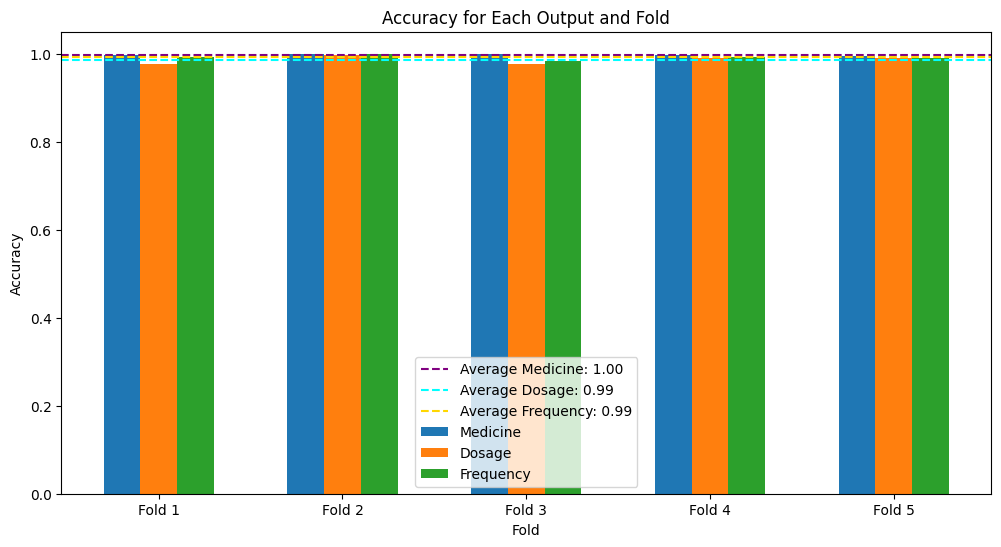

In [15]:
# Define the labels for the outputs
output_labels = ['Medicine', 'Dosage', 'Frequency']

# Define colors for the average accuracy lines
colors = ['purple', 'cyan', 'gold']

# Create an array with the positions of each bar on the x-axis
x = np.arange(len(all_accuracies))

# Create a bar chart for each output
plt.figure(figsize=(12, 6))
for i in range(len(output_labels)):
    plt.bar(x - 0.2 + i * 0.2, [acc[i] for acc in all_accuracies], 0.2, label=output_labels[i])
    plt.axhline(avg_accuracies[i], color=colors[i], linestyle='dashed', label=f'Average {output_labels[i]}: {avg_accuracies[i]:.2f}')

# Add labels and title
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Output and Fold')
plt.xticks(x, [f'Fold {i+1}' for i in range(len(all_accuracies))])

# Add a legend
plt.legend()

# Show the chart
plt.show()

In [44]:
classification_reports=[classification_report(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

for report in classification_reports:
    print(report)

                      precision    recall  f1-score   support

           Albuterol       1.00      1.00      1.00        14
         Amoxicillin       1.00      1.00      1.00        26
        Azithromycin       1.00      1.00      1.00        69
          Budesonide       0.92      0.92      0.92        12
         Doxycycline       1.00      1.00      1.00        53
         Fluticasone       0.98      0.98      0.98        55
   Hypertonic saline       1.00      1.00      1.00        14
           Ibuprofen       1.00      1.00      1.00        55
Supportive care only       1.00      1.00      1.00        53
          Tiotropium       1.00      1.00      1.00        49

            accuracy                           0.99       400
           macro avg       0.99      0.99      0.99       400
        weighted avg       0.99      0.99      0.99       400

                 precision    recall  f1-score   support

         0.5 mg       0.92      0.92      0.92        12
0.63 to 1.25 m

In [51]:
#save the model
with open('medication_prescription.pkl', 'wb') as file:
    pickle.dump(model, file)

In [65]:
with open('medication_prescription.pkl', 'rb') as file:
    s_model = pickle.load(file)

In [67]:
def predict_medication(user_data):
    #convert the user data to a dataframe
    user_df=pd.DataFrame([user_data])

    #encode the user data
    categorical_data=user_df[['Gender','Smoking Status','Disease']]
    numeric_data=user_df[['Age']]

    categorical_data=encoder.transform(categorical_data).toarray()
    features = np.hstack([numeric_data, categorical_data])
    prediction=s_model.predict(features)
    return prediction

In [68]:
user_data={}
user_data['Age']=input('Enter the age of the patient: ')
user_data['Gender']=input('Enter Gender of the patient: ')
user_data['Smoking Status']=input('Enter Smoking Status of the patient: ')
user_data['Disease']=input('Enter the Disease of the patient: ')

pred=predict_medication(user_data)
pred


array([['Tiotropium', '1 puff (18 mcg)', 'Once daily']], dtype=object)

In [70]:
pred[0][0]

'Tiotropium'